In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp
import pickle

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../input/BES/stratbr_grid_v3/gempy_format/"
geo_model = gp.create_model("StratBR2GemPy_test_4")

No module named 'osgeo'


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 179000, 0, 148000, -17500, 1000],
    resolution=[60, 60, 60],
    path_i=data_path + "2_merged_sp_reduced_more_z_ajusted.csv",
    path_o=data_path + "orientations_points_v3_7.csv",
)

Active grids: ['regular']


StratBR2GemPy_test_4  2024-03-07 18:05

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,TOP,Default series,1,#015482,1
1,bes_89,Default series,2,#9f0052,2
2,bes_90,Default series,3,#ffbe00,3
3,bes_91,Default series,4,#728f02,4
4,bes_92,Default series,5,#443988,5
5,bes_93,Default series,6,#ff3f20,6
6,bes_94,Default series,7,#5DA629,7
7,bes_95,Default series,8,#4878d0,8
8,bes_96,Default series,9,#ee854a,9
9,bes_97,Default series,10,#6acc64,10


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "TOP",
            "bes_89",
            "bes_90",
            "bes_91",
            "bes_92",
            "bes_93",
            "bes_94",
            "bes_95",
            "bes_96",
            "bes_97",
            "bes_98",
            "bes_99",
            "bes_100",
        ),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,TOP,Strat_Series,1,#015482,1
1,bes_89,Strat_Series,2,#9f0052,2
2,bes_90,Strat_Series,3,#ffbe00,3
3,bes_91,Strat_Series,4,#728f02,4
4,bes_92,Strat_Series,5,#443988,5
5,bes_93,Strat_Series,6,#ff3f20,6
6,bes_94,Strat_Series,7,#5DA629,7
7,bes_95,Strat_Series,8,#4878d0,8
8,bes_96,Strat_Series,9,#ee854a,9
9,bes_97,Strat_Series,10,#6acc64,10


In [5]:
geo_model.get_data()

X         Y      Z    smooth  surface   
surface_points 0          0.0       0.0  -2844  0.000002      TOP  \
               1      10000.0       0.0  -3870  0.000002      TOP   
               2      20000.0       0.0  -3587  0.000002      TOP   
               3      30000.0       0.0  -4059  0.000002      TOP   
               4      40000.0       0.0  -4286  0.000002      TOP   
...                       ...       ...    ...       ...      ...   
               7620  150000.0  148000.0 -14455  0.000002  bes_100   
               7632  160000.0  148000.0 -14847  0.000002  bes_100   
               7644  170000.0  148000.0 -15043  0.000002  bes_100   
               7656  179000.0  148000.0 -15065  0.000002  bes_100   
orientations   0          0.0       0.0  -2844  0.010000      TOP   

                              G_x           G_y  G_z  
surface_points 0              NaN           NaN  NaN  
               1              NaN           NaN  NaN  
               2              NaN           NaN  NaN  
               3              NaN           NaN  NaN  
               4              NaN           NaN  NaN  
...                           ...           ...  ...  
               7620           NaN           NaN  NaN  
               7632           NaN           NaN  NaN  
               7644           NaN           NaN  NaN  
               7656           NaN           NaN  NaN  
orientations   0     1.000000e-12  1.000000e-12  1.0  

[7658 rows x 8 columns]

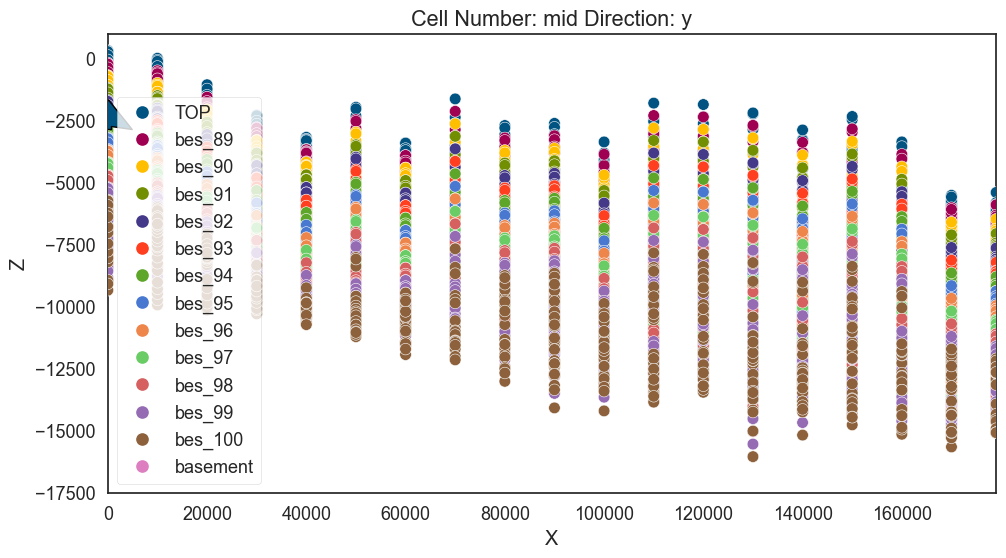

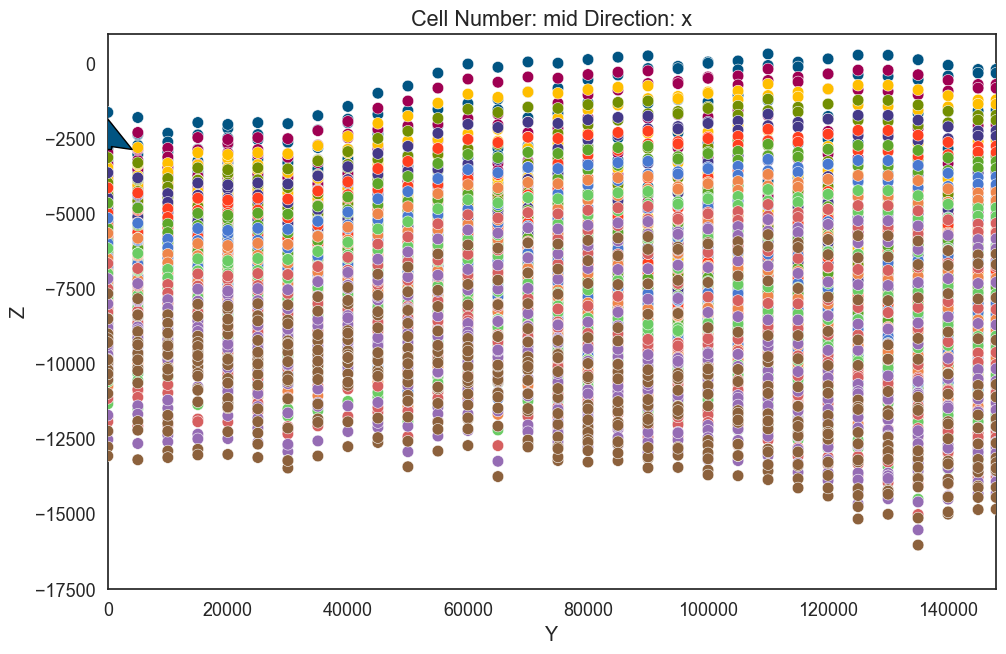

In [5]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=True)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=5, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [7]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=10,
)

In [6]:
%%time
gp.set_interpolator(
    geo_model, 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                             values
range                232996.244605
$C_o$            1292553571.428571
drift equations             [3, 3]
CPU times: total: 18.7 s
Wall time: 19.3 s


In [35]:
%%time
sol = gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 18min 51s
Wall time: 6min 47s


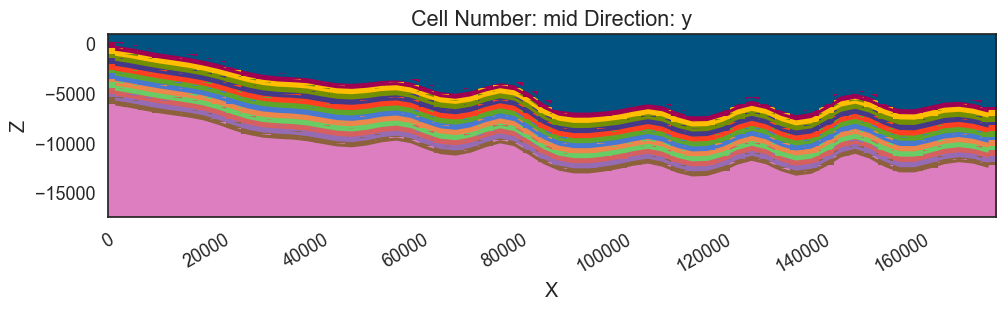

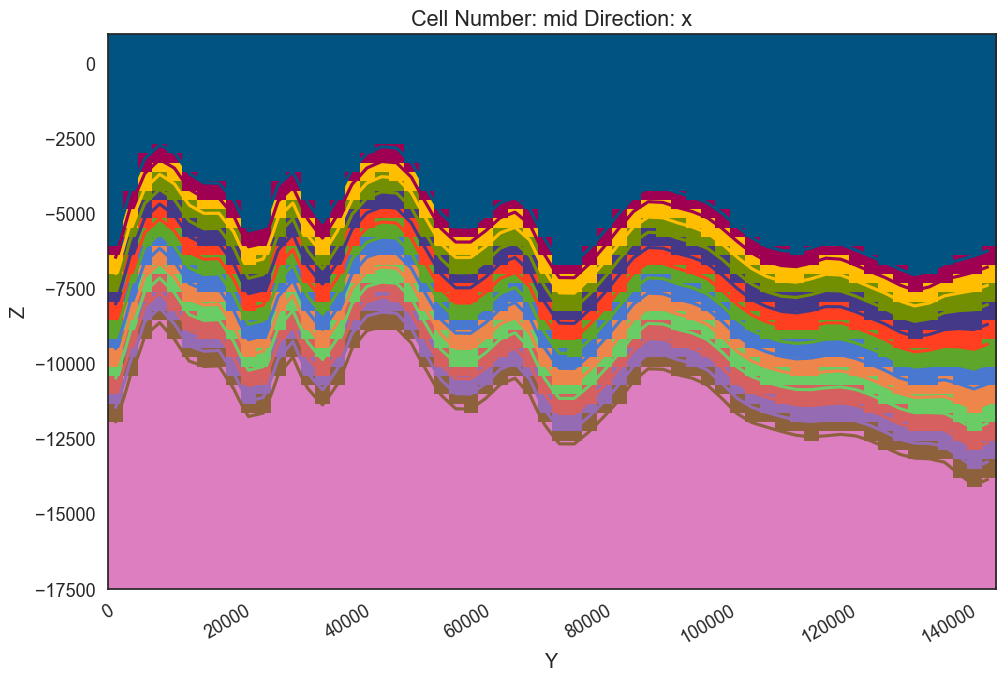

In [36]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True, ve=2, legend=True)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=5,
    legend=True,
)

In [14]:
"""# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=True)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=5,
    legend=True,
)"""

'# Seção transversal do modelo\ngp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=True)\ngp.plot_2d(\n    geo_model,\n    direction="x",\n    show_data=False,\n    show_lith=True,\n    ve=5,\n    legend=True,\n)'

In [37]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [12]:
"""topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)"""

'topo_init = tp.compute_topology(\n    geo_model, direction="x", voxel_threshold=1\n)  # , direction="Y", cell_number=15)\nedges_init, centroids_init = tp.clean_unconformity_topology(\n    geo_model, 1, topo_init[0], topo_init[1]\n)'

In [13]:
"""# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=False,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)"""

'# Seção transversal do modelo\ngp.plot_2d(\n    geo_model,\n    direction="y",\n    show_data=False,\n    show_lith=False,\n    ve=1,\n)\ngp.plot.plot_topology(geo_model, edges_init, centroids_init)'

In [157]:
# Save geo_model to a file
save_path_model = "../../../output/BES/StartBR/novos_testes/gempy_2.3.1/"
with open(save_path_model + 'geo_model.pkl', 'wb') as f:
    pickle.dump(geo_model, f)

In [5]:
save_path_model = "../../../output/BES/StartBR/novos_testes/gempy_2.3.1/"
# Load geo_model from a file
with open(save_path_model + 'geo_model.pkl', 'rb') as f:
    geo_model = pickle.load(f)

In [14]:
"""# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)"""

'# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)\ngp.save_model(\n    geo_model,\n    path="../../../output/",\n    compress=True,\n)'

### GemGis 

- Removando as surfaces geradas no Gempy

In [4]:
import gemgis as gg
import pyvista as pv
import pickle

def plot_all_sp(all_sp, z_scale=5, notebook=True, color_mode=1):
    '''
    Plot all_sp dictionary
    
    Arguments:
        all_sp: dictionary of polydata and color for each formation
        z_scale: vertical exaggeration factor, default is 5
        color_mode: mode for coloring the meshes, default is 1
            1: color each mesh with its own color
            2: color all meshes with the color of the first mesh
            3: color meshes based on the 'Depth [m]' scalar
    Returns:
        p: pyvista plotter with point clouds
    '''
    # Create the plotter
    p = pv.Plotter(notebook=notebook)

    # Get the color of the first mesh
    first_color = next(iter(all_sp.values()))[1]

    # Loop over the all_sp dictionary and add the meshes to the plotter
    for key, value in all_sp.items():
        mesh = value[0].copy()
        mesh.points[:, 2] *= z_scale

        # Determine the color of the mesh
        if color_mode == 1:
            p.add_mesh(mesh, color=value[1])
        elif color_mode == 2:
            p.add_mesh(mesh, color=first_color)
        elif color_mode == 3:
            p.add_mesh(mesh, scalars='Depth [m]')
        else:
            raise ValueError("Invalid color_mode")

    # Set the background color and show the grid
    p.set_background('white')
    p.show_grid(color='black')

    # Show the plot
    p.show()
    
    return p

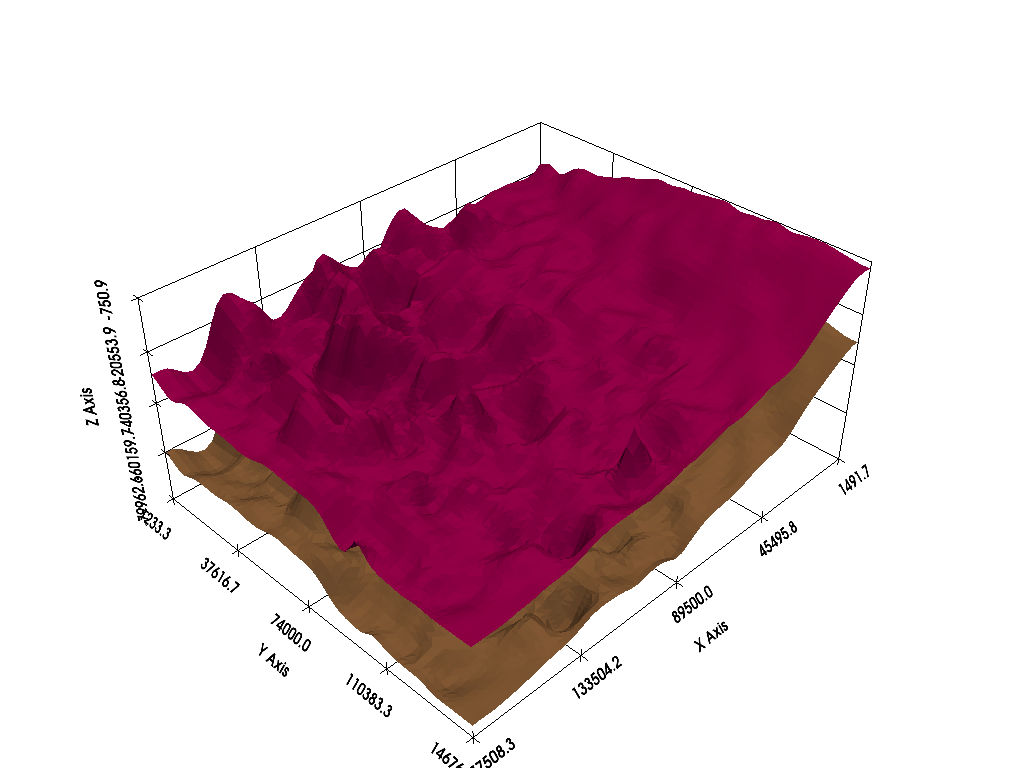

In [7]:
sfs = [
    'bes_89', 
    #'bes_90', 
    #'bes_91', 
    #'bes_92', 
    #'bes_93', 
    #'bes_94', 
    #'bes_95', 
    #'bes_96', 
    #'bes_97', 
    #'bes_98', 
    #'bes_99', 
    'bes_100',
    ]
all_sp = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model, surfaces=sfs)
plotter = plot_all_sp(all_sp, z_scale=5, color_mode=1)

In [9]:
all_sp

{'bes_89': [PolyData (0x14e354c4ac0)
    N Cells:    19448
    N Points:   9919
    N Strips:   0
    X Bounds:   1.492e+03, 1.775e+05
    Y Bounds:   1.233e+03, 1.468e+05
    Z Bounds:   -1.040e+04, -1.502e+02
    N Arrays:   1,
  '#9f0052'],
 'bes_100': [PolyData (0x14e3550eec0)
    N Cells:    20186
    N Points:   10298
    N Strips:   0
    X Bounds:   1.492e+03, 1.775e+05
    Y Bounds:   1.233e+03, 1.468e+05
    Z Bounds:   -1.599e+04, -5.607e+03
    N Arrays:   1,
  '#8c613c']}

In [155]:
# Save all_sp to a file
save_path = '../../../input/BES/testing_new_strat_br_extraction/'
with open(save_path + 'all_sp.pkl', 'wb') as f:
    pickle.dump(all_sp, f)

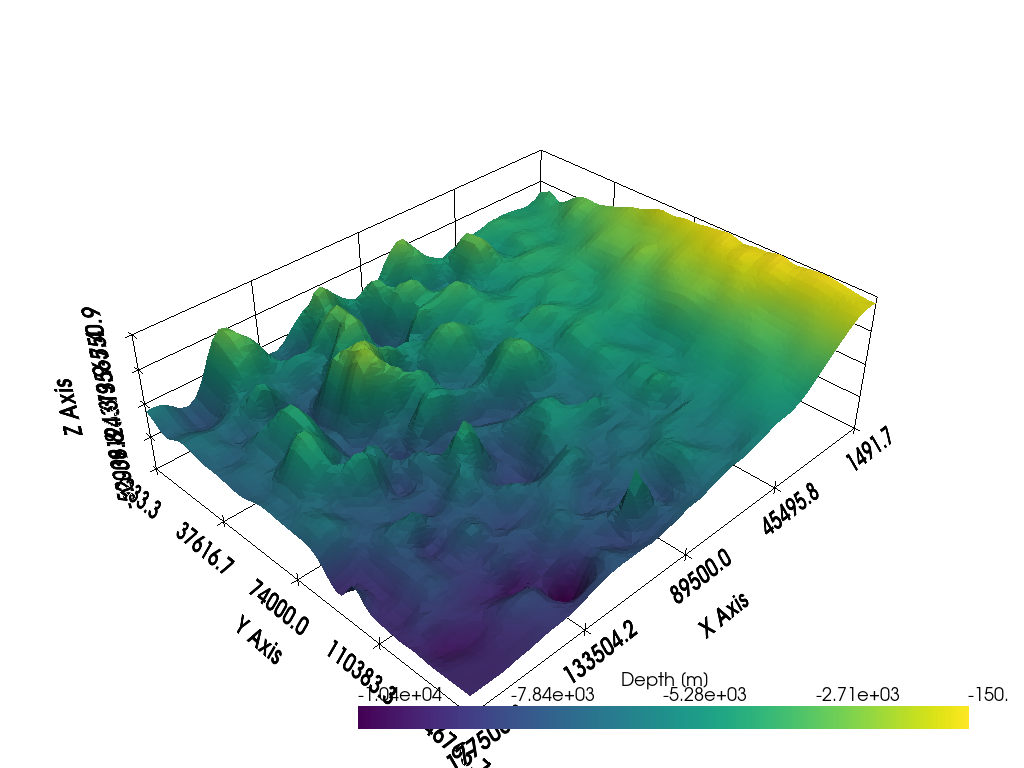

In [156]:
# Load all_sp from a file
with open('../../../input/BES/testing_new_strat_br_extraction/all_sp.pkl', 'rb') as f:
    testing = pickle.load(f)
plotter = plot_all_sp(testing, z_scale=5, color_mode=3)

### Surfaces to netcdf test 1

- A partir das surfaces do Gempy retirada pelo GemGis, transformar em netcdf

In [10]:
import numpy as np
import pyvista as pv
import xarray as xr
import gemgis as gg

def create_datasets(sfs, all_sp):
    '''
    Create a dictionary of xarray datasets, one for each formation
    
    Arguments:
        sfs: list of formations
        all_sp: dictionary of polydata and color for each formation
    Returns:
        datasets: dictionary of xarray datasets for each formation
    '''
    datasets = {}
    for formation in sfs:
        polydata, color = all_sp[formation]
        x, y, z = np.array(polydata.points.T)
        ds = xr.Dataset(
            {
                "X": ("point", x),
                "Y": ("point", y),
                "Z": ("point", z),
            },
            coords={
                "point": np.arange(len(x)),
            },
            attrs={
                "n_cells": polydata.GetNumberOfCells(),
                "color": color,
            },
        )
        datasets[formation] = ds
    return datasets

def plot_datasets(datasets, ve=1, notebook=False, color_mode=1):
    '''
    Plot xarray datasets
    
    Arguments:
        datasets: dictionary of xarray datasets for each formation
        ve: vertical exaggeration factor, default is 1
        color_mode: mode for coloring the meshes, default is 1
            1: color each mesh with its own color
            2: color all meshes with the color of the first mesh
            3: color meshes based on the Z coordinate
    Returns:
        p: pyvista plotter with point clouds
    '''
    # Create the plotter
    p = pv.Plotter(notebook=notebook)

    # Get the color of the first mesh
    first_color = next(iter(datasets.values())).attrs["color"]

    # Loop over the datasets and add the meshes to the plotter
    for formation, ds in datasets.items():
        points = np.column_stack([ds["X"].values, ds["Y"].values, ds["Z"].values * ve])
        mesh = pv.PolyData(points)
        mesh = mesh.delaunay_2d()

        # Determine the color of the mesh
        if color_mode == 1:
            p.add_mesh(mesh, color=ds.attrs["color"])
        elif color_mode == 2:
            p.add_mesh(mesh, color=first_color)
        elif color_mode == 3:
            p.add_mesh(mesh, scalars=ds["Z"].values * ve)
        else:
            raise ValueError("Invalid color_mode")

    # Set the background color and show the grid
    p.set_background('white')
    p.show_grid(color='black')

    # Show the plot
    p.show()
    
    return p

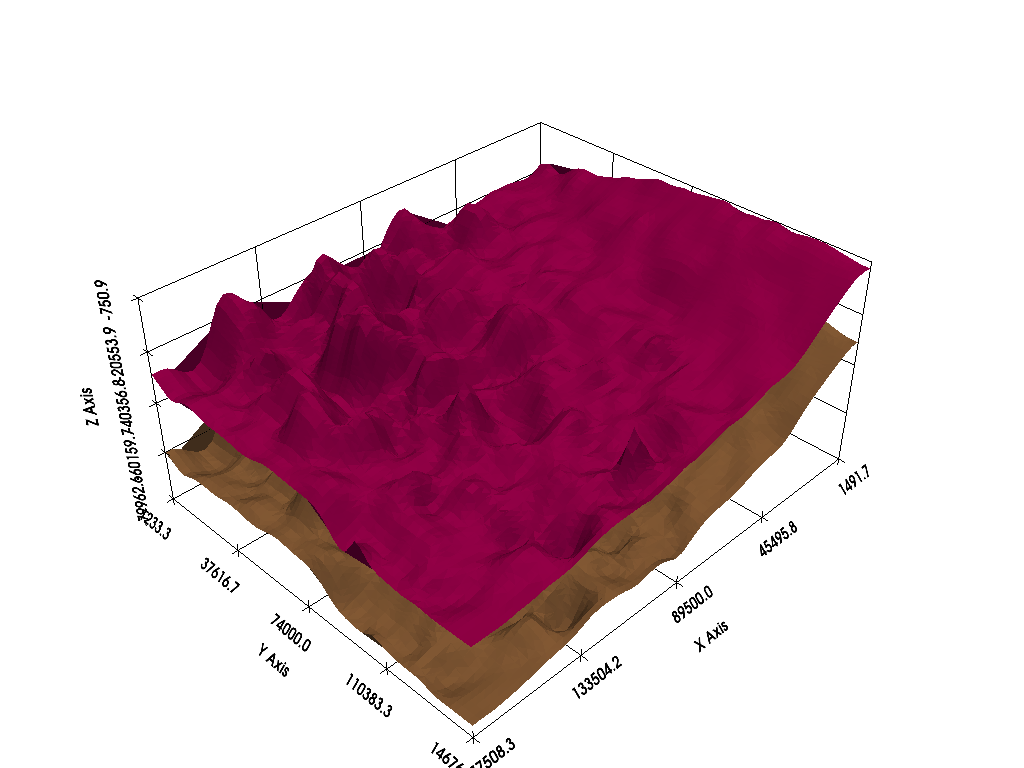

In [14]:
sfs = [
    'bes_89', 
    #'bes_90', 
    #'bes_91', 
    #'bes_92', 
    #'bes_93', 
    #'bes_94', 
    #'bes_95', 
    #'bes_96', 
    #'bes_97', 
    #'bes_98', 
    #'bes_99', 
    'bes_100',
    ]
all_sp = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model, surfaces=sfs)
datasets = create_datasets(sfs, all_sp)
#print(datasets)
plotter = plot_datasets(datasets, ve=5, color_mode=1, notebook=True)

In [17]:
datasets

{'bes_89': <xarray.Dataset> Size: 278kB
 Dimensions:  (point: 9919)
 Coordinates:
   * point    (point) int32 40kB 0 1 2 3 4 5 6 ... 9913 9914 9915 9916 9917 9918
 Data variables:
     X        (point) float64 79kB 2.841e+03 4.475e+03 ... 1.775e+05 1.775e+05
     Y        (point) float64 79kB 1.233e+03 3.624e+03 ... 1.443e+05 1.468e+05
     Z        (point) float64 79kB -3.779e+03 -3.779e+03 ... -8.931e+03
 Attributes:
     n_cells:  19448
     color:    #9f0052,
 'bes_100': <xarray.Dataset> Size: 288kB
 Dimensions:  (point: 10298)
 Coordinates:
   * point    (point) int32 41kB 0 1 2 3 4 5 ... 10293 10294 10295 10296 10297
 Data variables:
     X        (point) float64 82kB 2.55e+03 4.475e+03 ... 1.775e+05 1.775e+05
     Y        (point) float64 82kB 3.7e+03 1.233e+03 ... 1.443e+05 1.468e+05
     Z        (point) float64 82kB -9.329e+03 -9.51e+03 ... -1.505e+04 -1.502e+04
 Attributes:
     n_cells:  20186
     color:    #8c613c}

In [16]:
datasets["bes_89"]

<xarray.Dataset> Size: 278kB
Dimensions:  (point: 9919)
Coordinates:
  * point    (point) int32 40kB 0 1 2 3 4 5 6 ... 9913 9914 9915 9916 9917 9918
Data variables:
    X        (point) float64 79kB 2.841e+03 4.475e+03 ... 1.775e+05 1.775e+05
    Y        (point) float64 79kB 1.233e+03 3.624e+03 ... 1.443e+05 1.468e+05
    Z        (point) float64 79kB -3.779e+03 -3.779e+03 ... -8.931e+03
Attributes:
    n_cells:  19448
    color:    #9f0052

### Surfaces to netcdf test 2

- A partir das surfaces do Gempy retirada pelo GemGis, transformar em netcdf

In [83]:
import pyvistaqt as pvqt
import PVGeo

def plot_block_model(field):
    '''
    Function for plotting 3D Block Model based on GStools result
    
    Arguments:
        field: GSTools Spatial Random Field object (3D)
    Returns:
        p: pyvista plotter with voxel model
    '''
    
    # Create pyvista mesh for field
    pc = field.to_pyvista()
    
    # Find voxel size
    spacing = lambda arr: np.unique(np.diff(np.unique(arr)))
    voxelsize = spacing(pc.points[:,0]), spacing(pc.points[:,1]), spacing(pc.points[:,2])

    # Pvgeo way of voxelizing semi-unstructured grid
    grid = PVGeo.filters.VoxelizePoints(dx=voxelsize[0][0], dy=voxelsize[1][0], dz=voxelsize[2][0], estimate=False).apply(pc)

    # Plotting
    #p = pv.Plotter(notebook=True)
    p = pvqt.BackgroundPlotter()
    #p.add_mesh(grid, opacity=1, show_edges=True)
    cmap = plt.cm.get_cmap("viridis", 5)
    #p.add_mesh(grid, opacity=1, show_edges=False, lighting=False, cmap=cmap)
    p.add_mesh(grid, opacity=1, show_edges=False, lighting=False, cmap="viridis") # continuous cmap
    #p.add_mesh(pc, point_size=5, cmap='viridis')
    
    return p

def extract_domain(sol, unit, sf_colors):
    '''
    Extract domain coordinates from gempy model by unit name
    
    Arguments:
        sol: Gempy solution object.
        unit: string name of gempy surface
        sf_colors: Gempy Surfaces object
    Returns:
        dom_x, dom_y, dom_z, color: coordinates of domain and color of surface
    '''

    # Round Lithlogy block from gempy
    rounded_lithblock = sol.lith_block.round(0)
    rounded_lithblock = rounded_lithblock.astype(int)

    # Mask by array of input surfaces (by id, can be from different series)
    mask = np.isin(rounded_lithblock, [ref_dict[unit]])

    # Get coordinates by mask
    dom_grid = sol.grid.values[mask]

    # Split coordiantes
    dom_x = dom_grid[:,0]
    dom_y = dom_grid[:,1]
    dom_z = dom_grid[:,2]

    # Get color of the surface
    color = sf_colors.df.loc[sf_colors.df['surface'] == unit, 'color'].values[0]

    return dom_x, dom_y, dom_z, color

In [48]:
ref_dict = dict(geo_model.surfaces.df[['surface', 'id']].values)
print(ref_dict)
ref_dict2 = {
    "TOP": "TOP",
    "bes_89": "bes_89",
    "bes_90": "bes_90",
    "bes_91": "bes_91",
    "bes_92": "bes_92",
    "bes_93": "bes_93",
    "bes_94": "bes_94",
    "bes_95": "bes_95",
    "bes_96": "bes_96",
    "bes_97": "bes_97",
    "bes_98": "bes_98",
    "bes_99": "bes_99",
    "bes_100": "bes_100",
    }

{'TOP': 1, 'bes_89': 2, 'bes_90': 3, 'bes_91': 4, 'bes_92': 5, 'bes_93': 6, 'bes_94': 7, 'bes_95': 8, 'bes_96': 9, 'bes_97': 10, 'bes_98': 11, 'bes_99': 12, 'bes_100': 13, 'basement': 14}


In [82]:
sf_color = gp.get_data(
    geo_model,
    "surfaces",
)
sf_color

,surface,series,order_surfaces,color,id
0,TOP,Strat_Series,1,#015482,1
1,bes_89,Strat_Series,2,#9f0052,2
2,bes_90,Strat_Series,3,#ffbe00,3
3,bes_91,Strat_Series,4,#728f02,4
4,bes_92,Strat_Series,5,#443988,5
5,bes_93,Strat_Series,6,#ff3f20,6
6,bes_94,Strat_Series,7,#5DA629,7
7,bes_95,Strat_Series,8,#4878d0,8
8,bes_96,Strat_Series,9,#ee854a,9
9,bes_97,Strat_Series,10,#6acc64,10


In [84]:
# Extract domain from gempy model
domain_x, domain_y, domain_z, color = extract_domain(sol, ref_dict2["bes_89"], sf_color)
print(domain_x, domain_y, domain_z, color)

[  1491.66666667   1491.66666667   1491.66666667 ... 177508.33333333
 177508.33333333 177508.33333333] [  1233.33333333   3700.           6166.66666667 ... 141833.33333333
 144300.         146766.66666667] [-3470.83333333 -3162.5        -3162.5        ... -8712.5
 -8712.5        -8712.5       ] #9f0052


In [98]:
def plot_domain(domain_x, domain_y, domain_z, color, ve=1):
    '''
    Function for plotting 3D domain extracted from Gempy model
    
    Arguments:
        domain_x, domain_y, domain_z: arrays of domain coordinates
        color: color for the point cloud
    Returns:
        p: pyvista plotter with point cloud
    '''
    
    domain_z = domain_z * ve
    
    # Create a numpy array of the domain coordinates
    points = np.column_stack([domain_x, domain_y, domain_z])
    
    # Create a PyVista point cloud from the domain coordinates
    cloud = pv.PolyData(points)
    
    # Perform Delaunay 2D triangulation to create a mesh
    mesh = cloud.delaunay_2d()
    
    # Create a PyVista plotter
    p = pv.Plotter(notebook=True)
    #p = pvqt.BackgroundPlotter()
    
    # Add the point cloud to the plotter
    p.add_mesh(mesh, color=color)
    
    return p

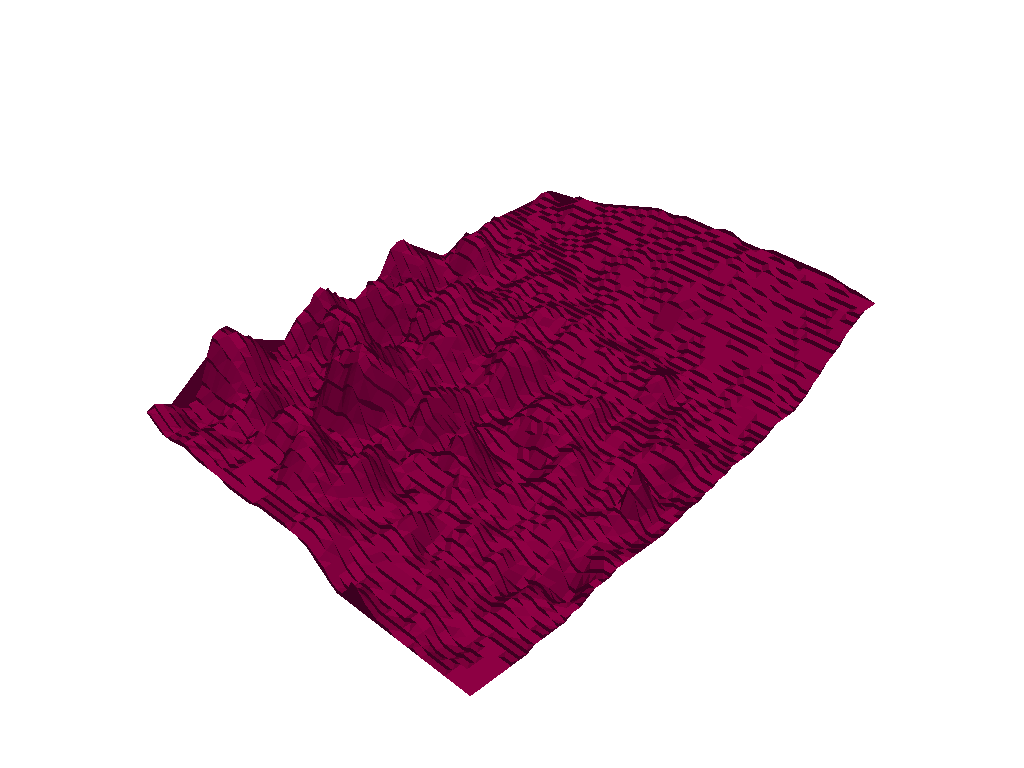

In [99]:
# Extract domain from gempy model
domain_x, domain_y, domain_z, color = extract_domain(sol, ref_dict2["bes_89"], sf_color)

# Plot the domain
plotter = plot_domain(domain_x, domain_y, domain_z, color, ve=5)
plotter.show()

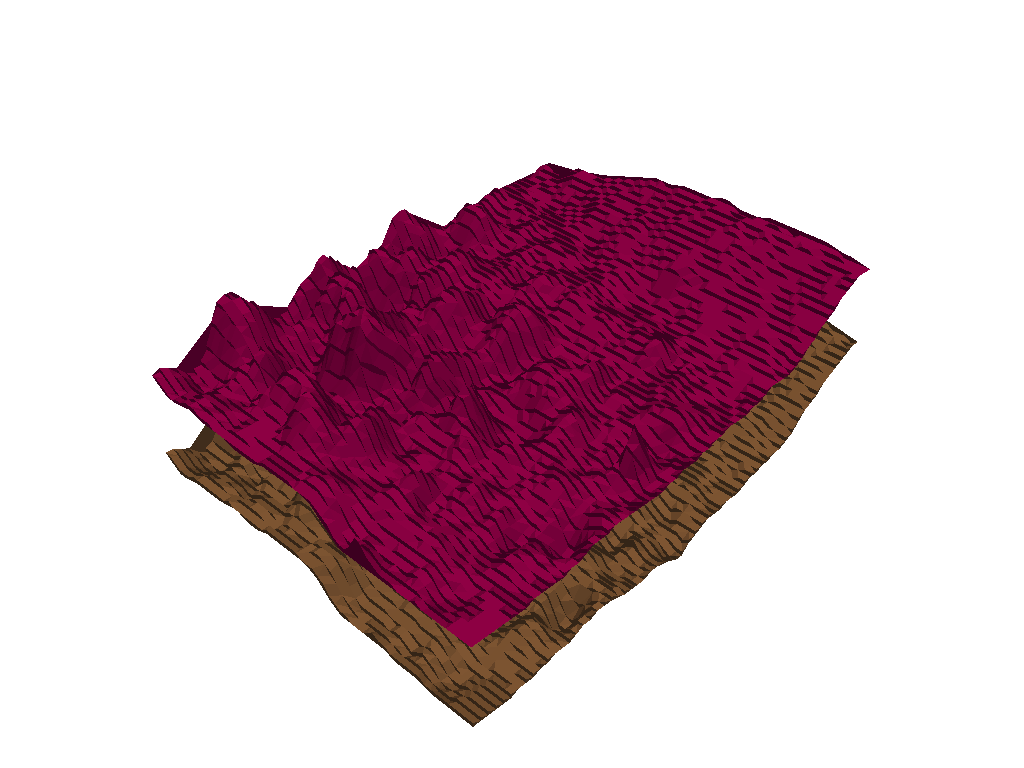

In [100]:
# Várias unidades
def extract_domains(sol, units, sf_colors):
    '''
    Extract domain coordinates from gempy model by unit name
    
    Arguments:
        sol: Gempy solution object.
        units: list of string names of gempy surfaces
        sf_colors: Gempy Surfaces object
    Returns:
        domains, colors: list of coordinates of domains and list of colors of surfaces
    '''
    domains = []
    colors = []
    
    for unit in units:
        # Round Lithlogy block from gempy
        rounded_lithblock = sol.lith_block.round(0)
        rounded_lithblock = rounded_lithblock.astype(int)

        # Mask by array of input surfaces (by id, can be from different series)
        mask = np.isin(rounded_lithblock, [ref_dict[unit]])

        # Get coordinates by mask
        dom_grid = sol.grid.values[mask]

        # Split coordiantes
        dom_x = dom_grid[:,0]
        dom_y = dom_grid[:,1]
        dom_z = dom_grid[:,2]

        # Get color of the surface
        color = sf_colors.df.loc[sf_colors.df['surface'] == unit, 'color'].values[0]

        domains.append((dom_x, dom_y, dom_z))
        colors.append(color)
    
    return domains, colors

def plot_domains(domains, colors, ve=1):
    '''
    Function for plotting 3D domains extracted from Gempy model
    
    Arguments:
        domains: list of tuples of domain coordinates
        colors: list of colors for the point clouds
    Returns:
        p: pyvista plotter with point clouds
    '''
    # Create a PyVista plotter
    p = pv.Plotter(notebook=True)
    
    for (domain_x, domain_y, domain_z), color in zip(domains, colors):
        domain_z = domain_z * ve

        # Create a numpy array of the domain coordinates
        points = np.column_stack([domain_x, domain_y, domain_z])

        # Create a PyVista point cloud from the domain coordinates
        cloud = pv.PolyData(points)

        # Perform Delaunay 2D triangulation to create a mesh
        mesh = cloud.delaunay_2d()

        # Add the point cloud to the plotter
        p.add_mesh(mesh, color=color)
    
    return p

ref_dict2 = {
    #"TOP": "TOP",
    "bes_89": "bes_89",
    #"bes_90": "bes_90",
    #"bes_91": "bes_91",
    #"bes_92": "bes_92",
    #"bes_93": "bes_93",
    #"bes_94": "bes_94",
    #"bes_95": "bes_95",
    #"bes_96": "bes_96",
    #"bes_97": "bes_97",
    #"bes_98": "bes_98",
    #"bes_99": "bes_99",
    "bes_100": "bes_100",
    }

ref_sufs = list(ref_dict2.values())

# Extract domains from gempy model
domains, colors = extract_domains(sol, ref_sufs, sf_color)

# Plot the domains
plotter = plot_domains(domains, colors, ve=5)
plotter.show()

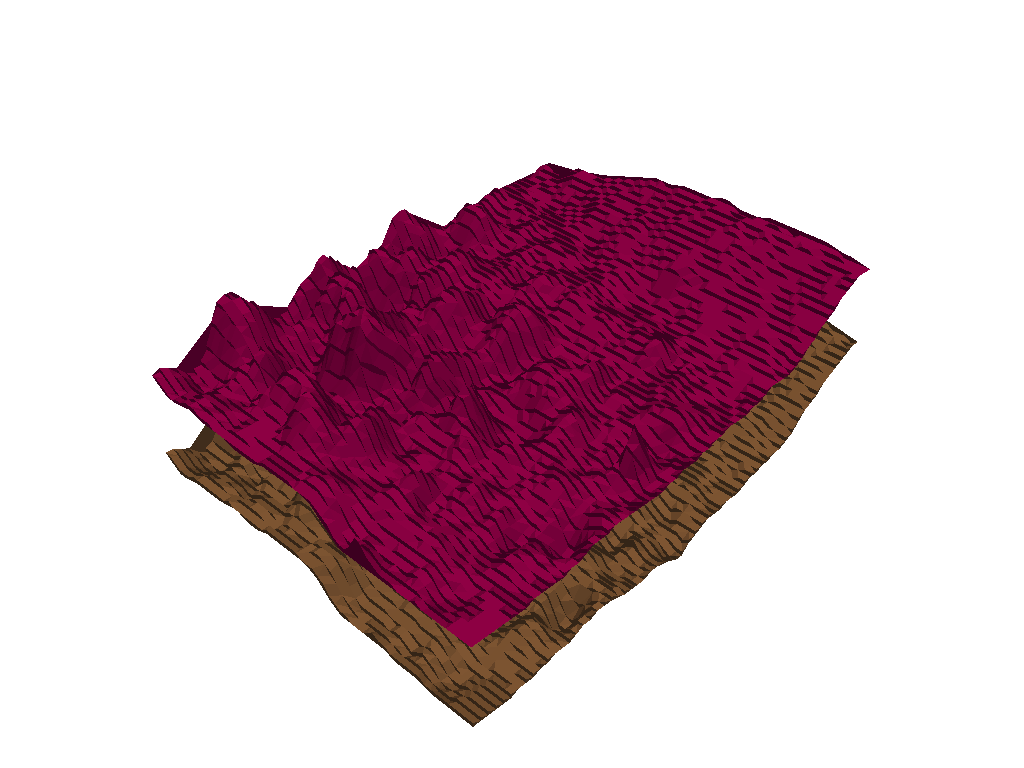

In [102]:
# Várias unidades
def extract_domains(sol, units, sf_colors):
    '''
    Extract domain coordinates from gempy model by unit name
    
    Arguments:
        sol: Gempy solution object.
        units: list of string names of gempy surfaces
        sf_colors: Gempy Surfaces object
    Returns:
        domains, colors: list of coordinates of domains and list of colors of surfaces
    '''
    domains = []
    colors = []
    
    for unit in units:
        # Round Lithlogy block from gempy
        rounded_lithblock = sol.lith_block.round(0)
        rounded_lithblock = rounded_lithblock.astype(int)

        # Mask by array of input surfaces (by id, can be from different series)
        mask = np.isin(rounded_lithblock, [ref_dict[unit]])

        # Get coordinates by mask
        dom_grid = sol.grid.values[mask]

        # Split coordiantes
        dom_x = dom_grid[:,0]
        dom_y = dom_grid[:,1]
        dom_z = dom_grid[:,2]

        # Get color of the surface
        color = sf_colors.df.loc[sf_colors.df['surface'] == unit, 'color'].values[0]

        domains.append((dom_x, dom_y, dom_z))
        colors.append(color)
    
    return domains, colors

def plot_domains(domains, colors, ve=1):
    '''
    Function for plotting 3D domains extracted from Gempy model
    
    Arguments:
        domains: list of tuples of domain coordinates
        colors: list of colors for the point clouds
    Returns:
        p: pyvista plotter with point clouds
    '''
    # Create a PyVista plotter
    p = pv.Plotter(notebook=True)
    
    for (domain_x, domain_y, domain_z), color in zip(domains, colors):
        domain_z = domain_z * ve

        # Create a numpy array of the domain coordinates
        points = np.column_stack([domain_x, domain_y, domain_z])

        # Create a PyVista from the domain coordinates
        mesh = pv.PolyData(points)

        # Perform Delaunay 2D triangulation to create a mesh
        mesh = mesh.delaunay_2d()

        # Add the point cloud to the plotter
        p.add_mesh(mesh, color=color)
    
    return p

ref_dict2 = {
    #"TOP": "TOP",
    "bes_89": "bes_89",
    #"bes_90": "bes_90",
    #"bes_91": "bes_91",
    #"bes_92": "bes_92",
    #"bes_93": "bes_93",
    #"bes_94": "bes_94",
    #"bes_95": "bes_95",
    #"bes_96": "bes_96",
    #"bes_97": "bes_97",
    #"bes_98": "bes_98",
    #"bes_99": "bes_99",
    "bes_100": "bes_100",
    }

ref_sufs = list(ref_dict2.values())

# Extract domains from gempy model
domains, colors = extract_domains(sol, ref_sufs, sf_color)

# Plot the domains
plotter = plot_domains(domains, colors, ve=5)
plotter.show()